In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [35]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.shape

(42000, 785)

In [37]:
df.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [38]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34627,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


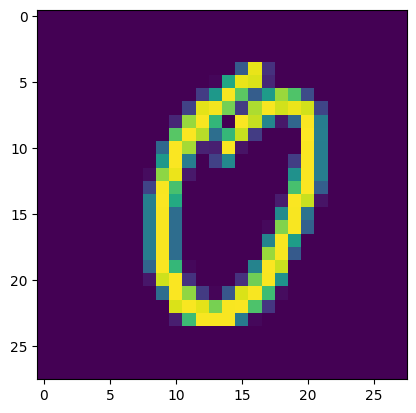

In [39]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[5764,1:].values.reshape(28,28))

In [40]:
X = df.drop(columns='label',axis=1)
y = df['label']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.579895973205566


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9663095238095238

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train_tr,y_train)

KNeighborsClassifier()

In [49]:
start = time.time()
y_pred = knn.predict(X_test_tr)
print(time.time() - start)

1.8788580894470215


In [50]:
accuracy_score(y_pred,y_test)

0.9538095238095238

In [ ]:
# Steps
# 1.Standardize the data i.e X_train and transform the X_test on the basis of that
# 2.create the PCA object and pass the number of component and fit_transform it 
# 3.Then creaate the object of the any Classifier 
# 4.Now fit the tansformed data to that object
# 5.Now predict the  data

In [67]:
X=df.drop(columns='label',axis=1)
y=df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
accuracy = []
for component in range(2,X.shape[1]):
    pca = PCA(n_components=component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_pred,y_test)
    accuracy.append(acc)
    print(acc)

0.3225
0.5085714285714286
0.6675
0.7390476190476191
0.8282142857142857
0.8416666666666667
0.8709523809523809
0.8857142857142857
0.9054761904761904
0.9101190476190476
0.9175
0.9267857142857143
0.9298809523809524
0.9333333333333333
0.9353571428571429
0.9363095238095238
0.9396428571428571
0.9415476190476191
0.9439285714285715
0.9419047619047619
0.9428571428571428
0.9435714285714286
0.9454761904761905
0.9460714285714286
0.9463095238095238
0.9466666666666667
0.9494047619047619
0.9484523809523809
0.9496428571428571
0.9508333333333333
0.9494047619047619
0.9502380952380952
0.9491666666666667
0.9533333333333334
0.9529761904761904
0.9534523809523809
0.9546428571428571
0.9538095238095238
0.9545238095238096
0.9539285714285715
0.9535714285714286
0.9536904761904762
0.9534523809523809
0.9535714285714286
0.9533333333333334
0.9536904761904762
0.9527380952380953
0.9544047619047619
0.9533333333333334
0.954047619047619
0.9542857142857143
0.9544047619047619
0.9539285714285715
0.9546428571428571
0.954047619